In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
titanic_passenger = pd.read_csv('/Users/mac/Downloads/test.csv')
titanic_passenger
survied_rate=pd.read_csv('/Users/mac/Downloads/gender_submission.csv')
survied_rate

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
titanic_passenger.isna().sum()
survied_rate.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [4]:
titanic_passenger.drop(columns=['Cabin'],inplace=True)
titanic_passenger.dropna(inplace=True)
titanic_passenger

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [5]:
merge_data=pd.merge(titanic_passenger,survied_rate,on='PassengerId')
merge_data.Survived.dropna()
merge_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
326,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,1
327,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,1
328,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,1
329,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1


In [6]:
def age_section(x) :
    if x < 5 : 
        x = 'Baby'
    elif 5 <= x < 12:
        x = 'Childreen'
    elif 12 <= x < 18:
        x = 'Teenager'
    elif 18 <= x < 39:
        x = 'Young Adult'
    elif 39 <= x < 67:
        x = 'Middle Adult'
    else:
        x = 'Elderly people'
    
    return x

In [8]:
merge_data['passenger_development_stage']=merge_data['Age'].apply(age_section)
merge_data['Name_titles'] = merge_data['Name'].str.extract(r', ([A-Za-z]+)\.')
merge_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,passenger_development_stage,Name_titles
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Young Adult,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Middle Adult,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Middle Adult,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Young Adult,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Young Adult,Mrs


In [9]:
survived_count_age=merge_data.groupby('passenger_development_stage')['Survived'].sum()
survived_count_age=survived_count_age.sort_values()
survived_count_class=merge_data.groupby('Pclass')['Survived'].sum()
survived_count_title=merge_data.groupby('Name_titles')['Survived'].sum()
survived_count_sib=merge_data.groupby('SibSp')['Survived'].sum()

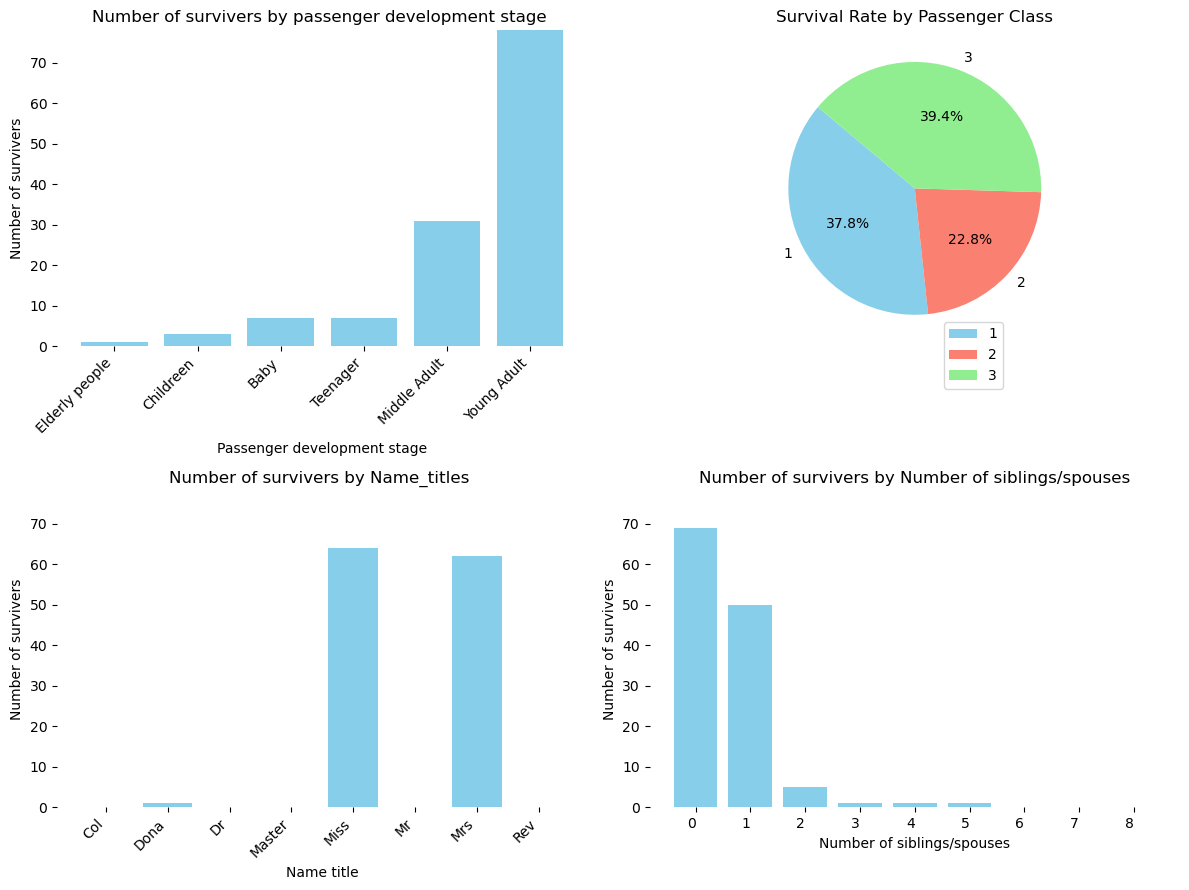

In [10]:
import numpy as np

fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(12, 9))
ax1.bar(survived_count_age.index, survived_count_age.values,color='skyblue')
ax1.set_xticks(survived_count_age.index)
ax1.set_xticklabels(survived_count_age.index, rotation=45, ha='right')
ax1.set_xlabel('Passenger development stage')
ax1.set_ylabel('Number of survivers')
ax1.set_title('Number of survivers by passenger development stage ')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Replace ax2.bar with pie chart code
ax2.pie(survived_count_class.values, labels=survived_count_class.index, colors=['skyblue', 'salmon', 'lightgreen'],
        autopct='%1.1f%%', startangle=140)
ax2.set_title('Survival Rate by Passenger Class')

ax2.legend(survived_count_class.index)
ax2.legend(survived_count_class.index, loc="upper right", bbox_to_anchor=(0.8, 0.1))

ax3.bar(survived_count_title.index, survived_count_title.values, color='skyblue')
ax3.set_xticks(survived_count_title.index)
ax3.set_xticklabels(survived_count_title.index, rotation=45, ha='right')
ax3.set_xlabel('Name title')
ax3.set_ylabel('Number of survivers')
ax3.set_title('Number of survivers by Name_titles ')
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax4.bar(survived_count_sib.index, survived_count_sib.values, color='skyblue')
x_ticks = np.arange(0, 9)  
ax4.set_xticks(x_ticks)
ax4.set_xticklabels(x_ticks, ha='right')
ax4.set_xlabel('Number of siblings/spouses')
ax4.set_ylabel('Number of survivers')
ax4.set_title('Number of survivers by Number of siblings/spouses')
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)

y_max = max(max(survived_count_age.values), max(survived_count_title.values), max(survived_count_sib.values))
ax1.set_ylim(0, y_max)
ax3.set_ylim(0, y_max)
ax4.set_ylim(0, y_max)

# Adjust layout
plt.tight_layout()
